In [2]:
#import all required library

#data wrangling 
import pandas as pd 
import numpy as np

#dataviz
import matplotlib.pyplot as plt
import seaborn as sns 

In [3]:
# extract the dataset and drop unnessecary columns
df_pokemon = pd.read_csv("./pokemon.csv").drop(["japanese_name", "pokedex_number", "percentage_male"], axis=1)
df_pokemon.head()

,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,...,hp,name,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary
0,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,45,Bulbasaur,65,65,45,grass,poison,6.9,1,0
1,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,60,Ivysaur,80,80,60,grass,poison,13.0,1,0
2,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,80,Venusaur,122,120,80,grass,poison,100.0,1,0
3,"['Blaze', 'Solar Power']",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,39,Charmander,60,50,65,fire,NaN,8.5,1,0
4,"['Blaze', 'Solar Power']",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,58,Charmeleon,80,65,80,fire,NaN,19.0,1,0


In [4]:
df_pokemon.shape

(801, 38)

In [5]:
df_pokemon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 801 entries, 0 to 800
Data columns (total 38 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   abilities          801 non-null    object 
 1   against_bug        801 non-null    float64
 2   against_dark       801 non-null    float64
 3   against_dragon     801 non-null    float64
 4   against_electric   801 non-null    float64
 5   against_fairy      801 non-null    float64
 6   against_fight      801 non-null    float64
 7   against_fire       801 non-null    float64
 8   against_flying     801 non-null    float64
 9   against_ghost      801 non-null    float64
 10  against_grass      801 non-null    float64
 11  against_ground     801 non-null    float64
 12  against_ice        801 non-null    float64
 13  against_normal     801 non-null    float64
 14  against_poison     801 non-null    float64
 15  against_psychic    801 non-null    float64
 16  against_rock       801 non

In [6]:
df_pokemon[df_pokemon["name"].str.contains("Mega")]

,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,...,hp,name,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary
153,"['Overgrow', 'Leaf Guard']",2.0,1.0,1.0,0.5,1.0,1.0,2.0,2.0,1.0,...,80,Meganium,83,100,80,grass,NaN,100.5,2,0


In [7]:
# Identify NaN Values

nan_col = df_pokemon.isnull().sum()[df_pokemon.isnull().sum() > 0]

nan_col_pokemon = pd.DataFrame({'NaN_count': nan_col, 'NaN_percentage': nan_col /
                                len(df_pokemon)}).sort_values(by = 'NaN_percentage', ascending=False)

nan_col_pokemon

,NaN_count,NaN_percentage
type2,384,0.479401
height_m,20,0.024969
weight_kg,20,0.024969


In [8]:
df_pokemon["type2"] = df_pokemon["type2"].fillna(df_pokemon["type1"])
df_pokemon["height_m"] = df_pokemon["height_m"].fillna('None')
df_pokemon["weight_kg"] = df_pokemon["weight_kg"].fillna('None')
df_pokemon.head()

,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,...,hp,name,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary
0,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,45,Bulbasaur,65,65,45,grass,poison,6.9,1,0
1,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,60,Ivysaur,80,80,60,grass,poison,13.0,1,0
2,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,80,Venusaur,122,120,80,grass,poison,100.0,1,0
3,"['Blaze', 'Solar Power']",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,39,Charmander,60,50,65,fire,fire,8.5,1,0
4,"['Blaze', 'Solar Power']",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,58,Charmeleon,80,65,80,fire,fire,19.0,1,0


In [9]:
print("Current data type of 'height_m':", df_pokemon['height_m'].dtype)
print("Current data type of 'weight_kg':", df_pokemon['weight_kg'].dtype)

Current data type of 'height_m': object
Current data type of 'weight_kg': object


In [10]:
print("Current data type of 'height_m':", df_pokemon['height_m'].dtype)

# Convert 'height_m' to float
# df_pokemon['height_m'] = df_pokemon['height_m'].astype(float)

# Check the updated data type
# print("Updated data type of 'height_m':", df_pokemon['height_m'].dtype)

Current data type of 'height_m': object


There's error because we assign the 'None' the null values of height_m and weight_kg. Therefore we need to convert again to NaN

In [11]:
# Replace 'None' or non-numeric values with NaN
df_pokemon['height_m'].replace({'None': np.nan, '': np.nan}, inplace=True)

# Convert 'height_m' to float
df_pokemon['height_m'] = df_pokemon['height_m'].astype(float)

# Check the updated data type and unique values
print("Updated data type of 'height_m':", df_pokemon['height_m'].dtype)
print(df_pokemon['height_m'].unique())

Updated data type of 'height_m': float64
[ 0.7  1.   2.   0.6  1.1  1.7  0.5  1.6  0.3  1.5  nan  1.2  3.5  0.4
  0.8  1.3  0.9  1.4  1.9  1.8  8.8  2.2  6.5  2.5  2.1  4.   2.3  0.2
  9.2  5.2  3.8 14.5  2.7  6.2  4.5  7.   2.4  5.4  4.2  3.7  3.2  3.3
  0.1  2.6  2.8  2.9  3.   5.8  5.   3.9  3.4  5.5]


In [12]:
# Replace 'None' or non-numeric values with NaN
df_pokemon['weight_kg'].replace({'None': np.nan, '': np.nan}, inplace=True)

# Convert 'height_m' to float
df_pokemon['weight_kg'] = df_pokemon['weight_kg'].astype(float)

# Check the updated data type and unique values
print("Updated data type of 'weight_kg':", df_pokemon['weight_kg'].dtype)
print(df_pokemon['weight_kg'].unique())

Updated data type of 'weight_kg': float64
[6.900e+00 1.300e+01 1.000e+02 8.500e+00 1.900e+01 9.050e+01 9.000e+00
 2.250e+01 8.550e+01 2.900e+00 9.900e+00 3.200e+01 3.200e+00 1.000e+01
 2.950e+01 1.800e+00 3.000e+01 3.950e+01       nan 2.000e+00 3.800e+01
 6.500e+01 6.000e+00 7.000e+00 2.000e+01 6.000e+01 1.950e+01 6.200e+01
 7.500e+00 4.000e+01 5.500e+00 1.200e+01 5.500e+01 5.400e+00 8.600e+00
 1.860e+01 1.250e+01 1.960e+01 7.660e+01 2.800e+01 1.550e+02 1.240e+01
 5.400e+01 5.650e+01 4.800e+01 7.050e+01 1.300e+02 4.000e+00 6.400e+00
 1.550e+01 4.550e+01 9.500e+01 3.600e+01 7.850e+01 1.500e+01 3.920e+01
 8.520e+01 9.000e+01 1.200e+02 1.325e+02 1.000e-01 4.050e+01 2.100e+02
 3.240e+01 7.560e+01 6.500e+00 1.040e+01 6.660e+01 2.500e+00 4.980e+01
 5.020e+01 6.550e+01 1.000e+00 9.500e+00 1.150e+02 3.460e+01 3.500e+01
 8.000e+01 8.000e+00 2.500e+01 3.900e+01 3.450e+01 5.450e+01 5.600e+01
 4.060e+01 4.450e+01 8.840e+01 2.350e+02 2.200e+02 2.900e+01 2.450e+01
 3.650e+01 1.150e+01 5.900e+01 4.60

In [13]:
# We fill the NaN values with 0
df_pokemon["height_m"] = df_pokemon["height_m"].fillna(df_pokemon["height_m"].mean())
df_pokemon["weight_kg"] = df_pokemon["weight_kg"].fillna(df_pokemon["weight_kg"].mean())

print(df_pokemon['height_m'].unique())
print(df_pokemon['weight_kg'].unique())

[ 0.7         1.          2.          0.6         1.1         1.7
  0.5         1.6         0.3         1.5         1.16389245  1.2
  3.5         0.4         0.8         1.3         0.9         1.4
  1.9         1.8         8.8         2.2         6.5         2.5
  2.1         4.          2.3         0.2         9.2         5.2
  3.8        14.5         2.7         6.2         4.5         7.
  2.4         5.4         4.2         3.7         3.2         3.3
  0.1         2.6         2.8         2.9         3.          5.8
  5.          3.9         3.4         5.5       ]
[6.9000000e+00 1.3000000e+01 1.0000000e+02 8.5000000e+00 1.9000000e+01
 9.0500000e+01 9.0000000e+00 2.2500000e+01 8.5500000e+01 2.9000000e+00
 9.9000000e+00 3.2000000e+01 3.2000000e+00 1.0000000e+01 2.9500000e+01
 1.8000000e+00 3.0000000e+01 3.9500000e+01 6.1378105e+01 2.0000000e+00
 3.8000000e+01 6.5000000e+01 6.0000000e+00 7.0000000e+00 2.0000000e+01
 6.0000000e+01 1.9500000e+01 6.2000000e+01 7.5000000e+00 4.0000000e+

In [14]:
df_pokemon.describe()

,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,against_grass,...,defense,experience_growth,height_m,hp,sp_attack,sp_defense,speed,weight_kg,generation,is_legendary
count,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,...,801.000000,8.010000e+02,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000
mean,0.996255,1.057116,0.968789,1.073970,1.068976,1.065543,1.135456,1.192884,0.985019,1.034020,...,73.008739,1.054996e+06,1.163892,68.958801,71.305868,70.911361,66.334582,61.378105,3.690387,0.087391
std,0.597248,0.438142,0.353058,0.654962,0.522167,0.717251,0.691853,0.604488,0.558256,0.788896,...,30.769159,1.602558e+05,1.066737,26.576015,32.353826,27.942501,28.907662,107.979179,1.930420,0.282583
min,0.250000,0.250000,0.000000,0.000000,0.250000,0.000000,0.250000,0.250000,0.000000,0.250000,...,5.000000,6.000000e+05,0.100000,1.000000,10.000000,20.000000,5.000000,0.100000,1.000000,0.000000
25%,0.500000,1.000000,1.000000,0.500000,1.000000,0.500000,0.500000,1.000000,1.000000,0.500000,...,50.000000,1.000000e+06,0.600000,50.000000,45.000000,50.000000,45.000000,9.300000,2.000000,0.000000
50%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,70.000000,1.000000e+06,1.000000,65.000000,65.000000,66.000000,65.000000,28.500000,4.000000,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,...,90.000000,1.059860e+06,1.500000,80.000000,91.000000,90.000000,85.000000,61.500000,5.000000,0.000000
max,4.000000,4.000000,2.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,...,230.000000,1.640000e+06,14.500000,255.000000,194.000000,230.000000,180.000000,999.900000,7.000000,1.000000


In [15]:
for i in df_pokemon["capture_rate"]:
    print(i, end=', ')

45, 45, 45, 45, 45, 45, 45, 45, 45, 255, 120, 45, 255, 120, 45, 255, 120, 45, 255, 127, 255, 90, 255, 90, 190, 75, 255, 90, 235, 120, 45, 235, 120, 45, 150, 25, 190, 75, 170, 50, 255, 90, 255, 120, 45, 190, 75, 190, 75, 255, 50, 255, 90, 190, 75, 190, 75, 190, 75, 255, 120, 45, 200, 100, 50, 180, 90, 45, 255, 120, 45, 190, 60, 255, 120, 45, 190, 60, 190, 75, 190, 60, 45, 190, 45, 190, 75, 190, 75, 190, 60, 190, 90, 45, 45, 190, 75, 225, 60, 190, 60, 90, 45, 190, 75, 45, 45, 45, 190, 60, 120, 60, 30, 45, 45, 225, 75, 225, 60, 225, 60, 45, 45, 45, 45, 45, 45, 45, 255, 45, 45, 35, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 25, 3, 3, 3, 45, 45, 45, 3, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 255, 90, 255, 90, 255, 90, 255, 90, 90, 190, 75, 190, 150, 170, 190, 75, 190, 75, 235, 120, 45, 45, 190, 75, 65, 45, 255, 120, 45, 45, 235, 120, 75, 255, 90, 45, 45, 30, 70, 45, 225, 45, 60, 190, 75, 190, 60, 25, 190, 75, 45, 25, 190, 45, 60, 120, 60, 190, 75, 225, 75, 60, 190, 75, 45, 25, 25, 120, 45, 45,

In [16]:
df_pokemon[df_pokemon["capture_rate"] == "30 (Meteorite)255 (Core)"][[
    "name", "capture_rate", "type1", "generation", "classfication"
    ]]

,name,capture_rate,type1,generation,classfication
773,Minior,30 (Meteorite)255 (Core),rock,7,Meteor Pokémon


In [17]:
df_pokemon["capture_rate"].replace({"30 (Meteorite)255 (Core)": "30"}, inplace=True)
df_pokemon["capture_rate"] = df_pokemon["capture_rate"].astype('int')
df_pokemon["capture_rate"].dtype

dtype('int32')

In [18]:
# Adding total abilities that a pokemon has
df_pokemon["tot_abilities"] = df_pokemon.apply(lambda x: len(x["abilities"]), axis=1)

In [19]:
print(f'Unique primary types: {df_pokemon["type1"].nunique()}')
print(f'Unique secondary types: {df_pokemon["type2"].nunique()}')
print(f'Total of Legendary Pokemon types: {df_pokemon[df_pokemon["is_legendary"] == 1].shape[0]}')

Unique primary types: 18
Unique secondary types: 18
Total of Legendary Pokemon types: 70


There already no imbalanced data for primary and secondary of pokemon types. And the total of legendary pokemon types is 70 pokemons.

In [20]:
df_pokemon.describe().T

,count,mean,std,min,25%,50%,75%,max
against_bug,801.0,9.962547e-01,0.597248,0.25,0.5,1.0,1.0,4.0
against_dark,801.0,1.057116e+00,0.438142,0.25,1.0,1.0,1.0,4.0
against_dragon,801.0,9.687890e-01,0.353058,0.00,1.0,1.0,1.0,2.0
against_electric,801.0,1.073970e+00,0.654962,0.00,0.5,1.0,1.0,4.0
against_fairy,801.0,1.068976e+00,0.522167,0.25,1.0,1.0,1.0,4.0
against_fight,801.0,1.065543e+00,0.717251,0.00,0.5,1.0,1.0,4.0
against_fire,801.0,1.135456e+00,0.691853,0.25,0.5,1.0,2.0,4.0
against_flying,801.0,1.192884e+00,0.604488,0.25,1.0,1.0,1.0,4.0
against_ghost,801.0,9.850187e-01,0.558256,0.00,1.0,1.0,1.0,4.0
against_grass,801.0,1.034020e+00,0.788896,0.25,0.5,1.0,1.0,4.0


Text(0.5, 1.0, 'Correlation Heatmap (Excluding against_ columns and string columns)')

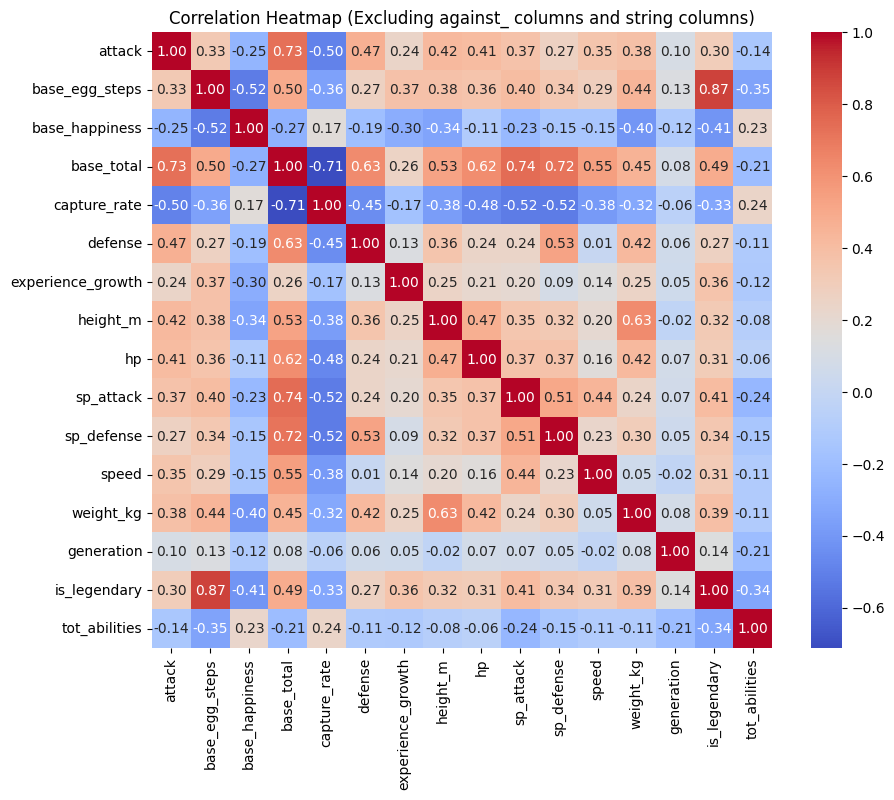

In [21]:
# Filter out 'against_' columns and string columns
numerical_columns = df_pokemon.select_dtypes(include=['float64', 'int64', 'float32', 'int32']).columns
non_against_string_columns = [col for col in numerical_columns if not col.startswith('against_')]

# Filter the dataset to include only numerical columns excluding 'against_' columns
filtered_data = df_pokemon[non_against_string_columns]

# Calculate the correlation matrix
correlation_matrix = filtered_data.corr()

# Create the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap (Excluding against_ columns and string columns)')

### Here in general stats, we can see that:

1. Base total (base_total) has a good correlation with the attack and defense attributes. For example,
    * base_total with attack: 0.73
    * base_total with sp.attack: 0.74
    * base_total with defense: 0.63
    * base_total with sp.defense: 0.72
2. A pokemon being legendary has a huge correlation with the pokemon’s Egg Steps (i.e. 0.87).

3. The Weight of the pokemon is dependent and correlated with the Height of the pokemon. (i.e. 0.63)

In [166]:
np.var(df_pokemon[['base_total', 'attack']], ddof=1)

c:\Users\nugrahaji27\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\core\fromnumeric.py:3785: FutureWarning: The behavior of DataFrame.var with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return var(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)


base_total    14209.492672
attack         1034.189719
dtype: float64

In [173]:
np.cov(df_pokemon['base_total'], df_pokemon['attack'])

array([[14209.49267166,  2798.92997659],
       [ 2798.92997659,  1034.1897191 ]])

Text(0, 0.5, 'Attack')

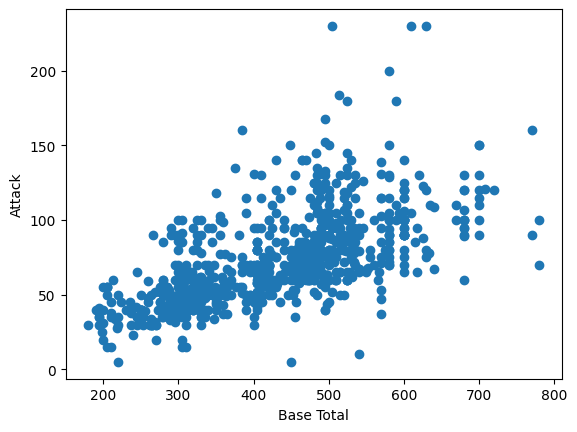

In [170]:
plt.scatter(df_pokemon['base_total'], df_pokemon['attack'])
plt.xlabel('Base Total')
plt.ylabel('Attack')

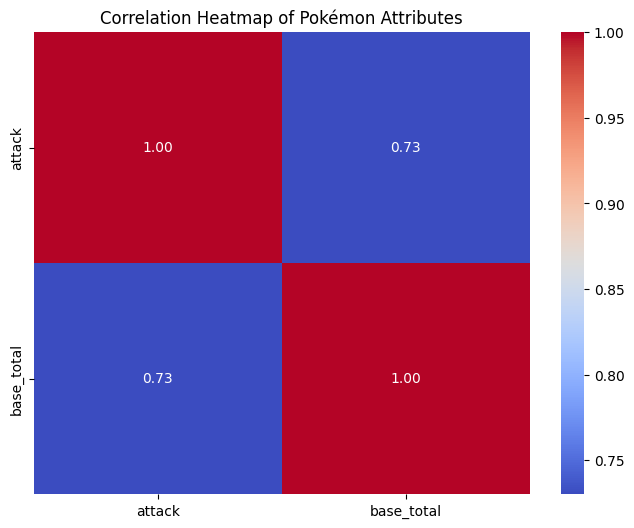

In [169]:
# Select attributes for correlation analysis (example: 'attack', 'defense', 'height_m', 'weight_kg')
attributes = ['attack', 'base_total']

# Compute the correlation matrix
correlation_matrix = df_pokemon[attributes].corr()

# Visualize the correlation matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Pokémon Attributes')
plt.show()

In [180]:
cov_matrix = np.cov(df_pokemon['base_egg_steps'], df_pokemon['is_legendary'])
covariance_value = cov_matrix[0, 1]  # or cov_matrix[1, 0], since covariance is symmetric
print(f"Covariance between 'base_egg_steps' and 'is_legendary': {covariance_value:.2f}")

Covariance between 'base_egg_steps' and 'is_legendary': 1618.79


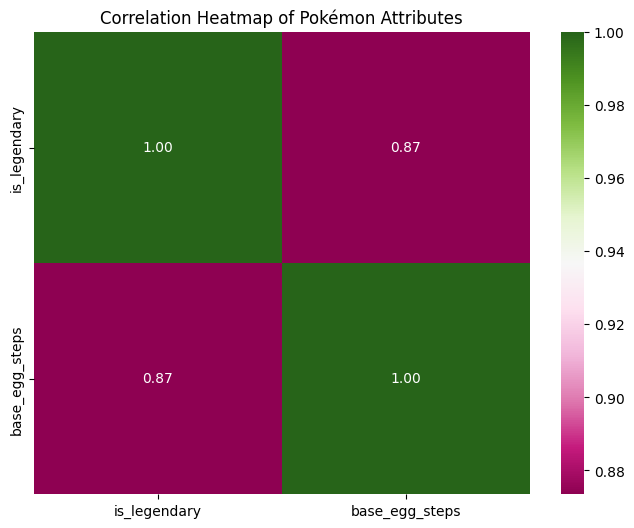

In [176]:
attributes = ['is_legendary', 'base_egg_steps']

# Compute the correlation matrix
correlation_matrix = df_pokemon[attributes].corr()

# Visualize the correlation matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='PiYG', fmt=".2f")
plt.title('Correlation Heatmap of Pokémon Attributes')
plt.show()

In [181]:
cov_matrix = np.cov(df_pokemon['weight_kg'], df_pokemon['height_m'])
covariance_value = cov_matrix[0, 1]  # or cov_matrix[1, 0], since covariance is symmetric
print(f"Covariance between 'weight_kg' and 'height_m': {covariance_value:.2f}")

Covariance between 'weight_kg' and 'height_m': 72.17


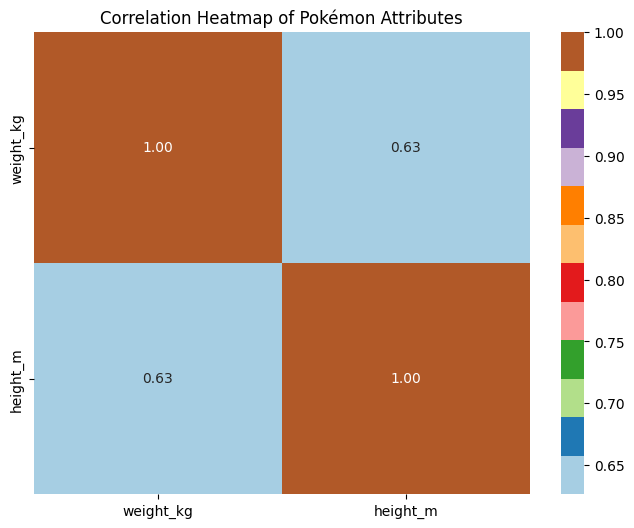

In [186]:
attributes = ['weight_kg', 'height_m']

# Compute the correlation matrix
correlation_matrix = df_pokemon[attributes].corr()

# Visualize the correlation matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='Paired', fmt=".2f")
plt.title('Correlation Heatmap of Pokémon Attributes')
plt.show()

### Analysis Descriptive Statistics

#### 1. How does the speed of Pokemon relate to various base factors?

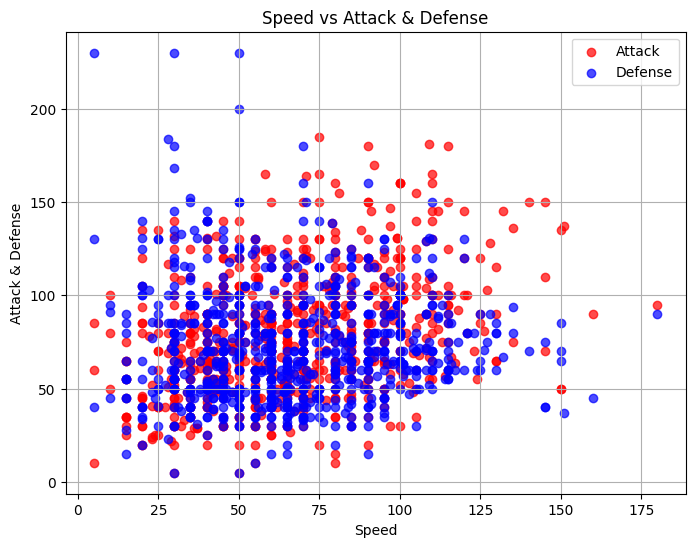

In [22]:
# Creating the scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(df_pokemon["speed"], df_pokemon["attack"], label='Attack', color='red', alpha=0.7)
plt.scatter(df_pokemon["speed"], df_pokemon["defense"], label='Defense', color='blue', alpha=0.7)

plt.title('Speed vs Attack & Defense')
plt.xlabel('Speed')
plt.ylabel('Attack & Defense')
plt.legend()
plt.grid(True)
plt.show()

How about we adjust with height and weight?

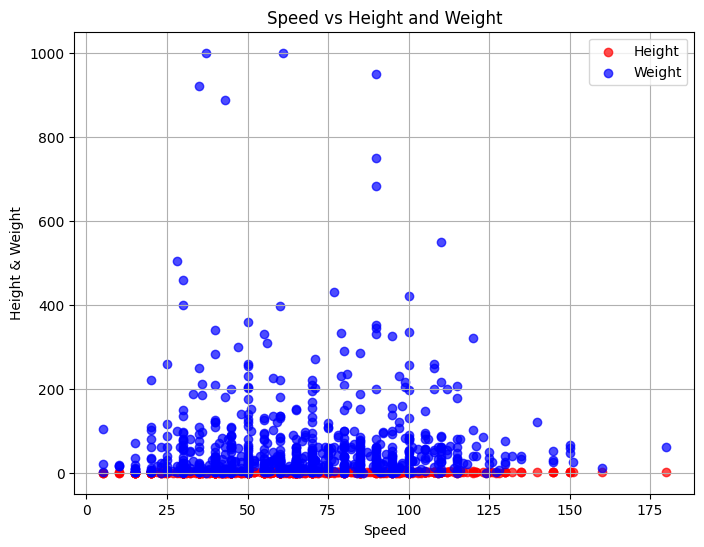

In [23]:
plt.figure(figsize=(8, 6))
plt.scatter(df_pokemon["speed"], df_pokemon["height_m"], label='Height', color='red', alpha=0.7)
plt.scatter(df_pokemon["speed"], df_pokemon["weight_kg"], label='Weight', color='blue', alpha=0.7)

plt.title('Speed vs Height and Weight')
plt.xlabel('Speed')
plt.ylabel('Height & Weight')
plt.legend()
plt.grid(True)
plt.show()

##### Observations:
1. A pokemon’s attack capacity slightly depends on it’s speed, as some of the pokemon have moderate speed but a good attack capacity, while some are very fast yet lacking in their attack capacity.

2. Similarly, the weight of pokemon highly affects its speed, as the pokemon with heavyweight is slower, and most of the pokemons are lightweight and have a moderate to high speed.

#### 2. What is the count of pokemon per generation?

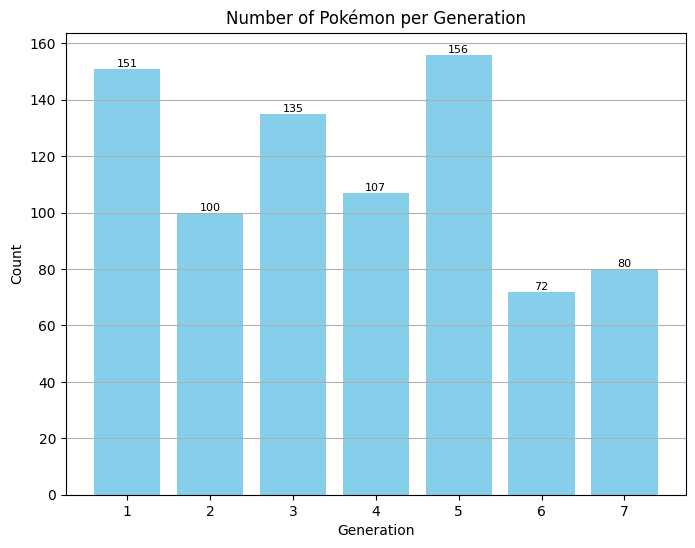

In [24]:
# Count the number of Pokémon per generation
pokemon_per_generation = df_pokemon['generation'].value_counts().sort_index()

# Create a bar chart
plt.figure(figsize=(8, 6))
bars = plt.bar(pokemon_per_generation.index, pokemon_per_generation, color='skyblue')
# Display count values on top of each bar
for bar, count in zip(bars, pokemon_per_generation):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), count,
             ha='center', va='bottom',  fontsize=8)
plt.title('Number of Pokémon per Generation')
plt.xlabel('Generation')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()

From the above count plot, we can figure out that most of the pokemons are from Gen-5, and least in Gen-6.

Also, we can see that odd Generations have a larger number of pokemons than even a number of generations.

#### 3. How many types of pokemon are there in each generation?

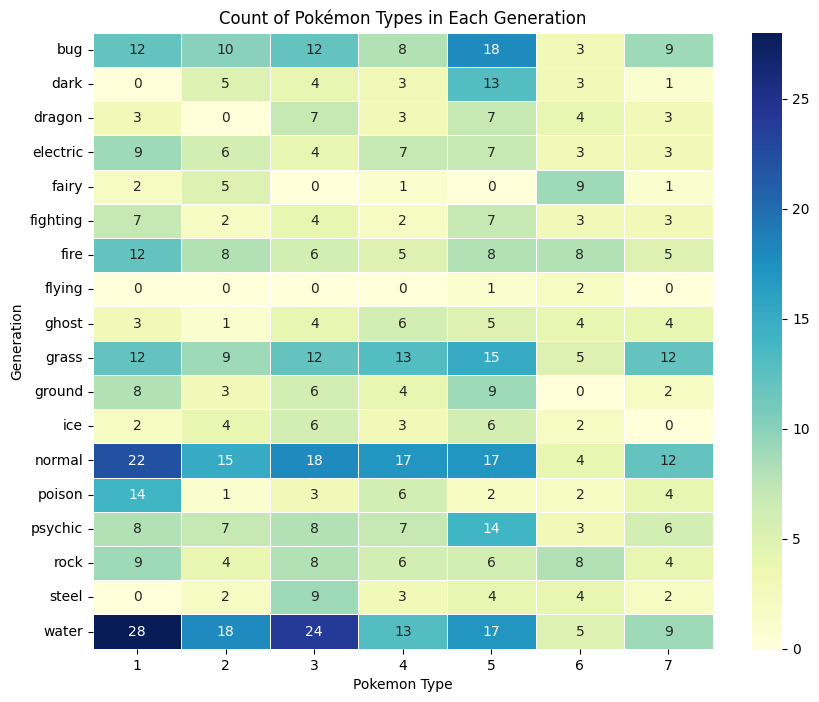

In [25]:
# Create a pivot table counting the occurrences of each Pokemon type within each generation
pokemon_types_per_generation = df_pokemon.pivot_table(index='type1', columns='generation', aggfunc='size', fill_value=0)

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(pokemon_types_per_generation, cmap='YlGnBu', annot=True, fmt='d', linewidths=0.5)
plt.title('Count of Pokémon Types in Each Generation')
plt.xlabel('Pokemon Type')
plt.ylabel('Generation')
plt.show()

##### Observations:
* Most of the pokemons in Generation 1, 2 & 3 are of Water Type.
* Most of the pokemons in Generation 4 are of Normal Type.
* Most of the pokemons in Generation 5 are of Bug Type.
* Most of the pokemons in Generation 6 are of Fairy-Type.
* Most of the pokemons in Generation 7 are of Grass & Normal Type.

#### 4. Which type has the easiest pokemon to catch?

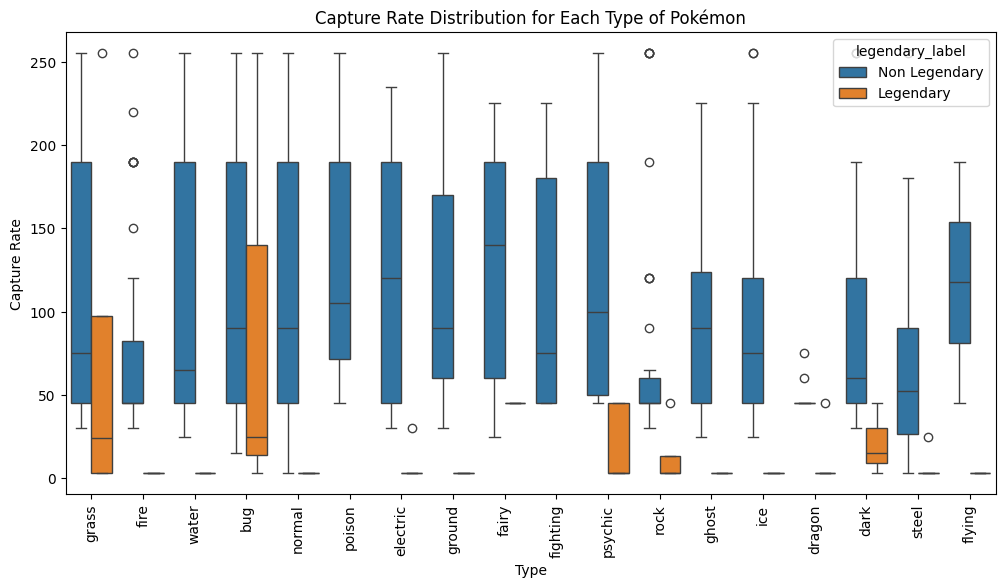

count        mean         std   min    25%    50%  \
type1    legendary_label                                                      
bug      Legendary          3.0   94.333333  139.575547   3.0  14.00   25.0   
         Non Legendary     69.0  120.942029   77.551100  15.0  45.00   90.0   
dark     Legendary          3.0   21.000000   21.633308   3.0   9.00   15.0   
         Non Legendary     26.0   91.807692   68.347359  30.0  45.00   60.0   
dragon   Legendary          7.0    9.000000   15.874508   3.0   3.00    3.0   
         Non Legendary     20.0   47.250000    7.340407  45.0  45.00   45.0   
electric Legendary          5.0    8.400000   12.074767   3.0   3.00    3.0   
         Non Legendary     34.0  121.470588   72.619071  30.0  45.00  120.0   
fairy    Legendary          1.0   45.000000         NaN  45.0  45.00   45.0   
         Non Legendary     17.0  121.176471   67.187457  25.0  60.00  140.0   
fighting Non Legendary     28.0  103.750000   65.257680  45.0  45.00   75.0   
fire     Legendary          5.0    3.000000    0.000000   3.0   3.00    3.0   
         Non Legendary     47.0   79.787234   57.972608  30.0  45.00   45.0   
flying   Legendary          1.0    3.000000         NaN   3.0   3.00    3.0   
         Non Legendary      2.0  117.500000  102.530483  45.0  81.25  117.5   
ghost    Legendary          1.0    3.000000         NaN   3.0   3.00    3.0   
         Non Legendary     26.0   97.307692   58.124535  25.0  45.00   90.0   
grass    Legendary          4.0   76.500000  120.635816   3.0   3.00   24.0   
         Non Legendary     74.0  108.581081   76.791482  30.0  45.00   75.0   
ground   Legendary          2.0    3.000000    0.000000   3.0   3.00    3.0   
         Non Legendary     30.0  115.333333   72.527442  30.0  60.00   90.0   
ice      Legendary          2.0    3.000000    0.000000   3.0   3.00    3.0   
         Non Legendary     21.0  102.857143   75.059500  25.0  45.00   75.0   
normal   Legendary          3.0    3.000000    0.000000   3.0   3.00    3.0   
         Non Legendary    102.0  123.666667   85.810213   3.0  45.00   90.0   
poison   Non Legendary     32.0  128.437500   72.495133  45.0  71.25  105.0   
psychic  Legendary         17.0   17.823529   20.688872   3.0   3.00    3.0   
         Non Legendary     36.0  119.166667   71.419285  45.0  50.00  100.0   
rock     Legendary          4.0   13.500000   21.000000   3.0   3.00    3.0   
         Non Legendary     41.0   76.463415   66.485373  30.0  45.00   45.0   
steel    Legendary          6.0    6.666667    8.981462   3.0   3.00    3.0   
         Non Legendary     18.0   76.333333   70.134325   3.0  26.25   52.5   
water    Legendary          6.0    3.000000    0.000000   3.0   3.00    3.0   
         Non Legendary    108.0  104.768519   74.555957  25.0  45.00   65.0   

                             75%    max  
type1    legendary_label                 
bug      Legendary        140.00  255.0  
         Non Legendary    190.00  255.0  
dark     Legendary         30.00   45.0  
         Non Legendary    120.00  255.0  
dragon   Legendary          3.00   45.0  
         Non Legendary     45.00   75.0  
electric Legendary          3.00   30.0  
         Non Legendary    190.00  235.0  
fairy    Legendary         45.00   45.0  
         Non Legendary    190.00  225.0  
fighting Non Legendary    180.00  225.0  
fire     Legendary          3.00    3.0  
         Non Legendary     82.50  255.0  
flying   Legendary          3.00    3.0  
         Non Legendary    153.75  190.0  
ghost    Legendary          3.00    3.0  
         Non Legendary    123.75  225.0  
grass    Legendary         97.50  255.0  
         Non Legendary    190.00  255.0  
ground   Legendary          3.00    3.0  
         Non Legendary    170.00  255.0  
ice      Legendary          3.00    3.0  
         Non Legendary    120.00  255.0  
normal   Legendary          3.00    3.0  
         Non Legendary    190.00  255.0  
poison   Non Legendary    190.00  255.0  
psych

In [26]:
# Mapping 0 and 1 to 'Non Legendary' and 'Legendary' respectively in a new column 'legendary_label'
df_pokemon['legendary_label'] = df_pokemon['is_legendary'].map({0: 'Non Legendary', 1: 'Legendary'})

# Grouping the data by 'type1' and calculating statistics for 'capture_rate'
capture_rate_stats = df_pokemon.groupby(['type1', 'legendary_label'])['capture_rate'].describe()

# Plotting the distributions
plt.figure(figsize=(12, 6))
sns.boxplot(x='type1', y='capture_rate', hue='legendary_label', data=df_pokemon)
plt.title('Capture Rate Distribution for Each Type of Pokémon')
plt.xlabel('Type')
plt.ylabel('Capture Rate')
plt.xticks(rotation=90)
plt.show()

# Summary statistics for capture_rate for each type
capture_rate_stats

##### Observations:
The easiest pokemon to capture is from the “Fairy Type”, "Water Type", and "Grass Type", whereas the hardest to capture is “Dragon-Type”. Also, it’s pretty hard to capture the “Fire Type” or “Rock Type” pokemons. On the other hand in Legendary pokemons, the easiest pokemon to capture will be from the “Grass or Bug” type.

#### 5. What are the most common type combinations?

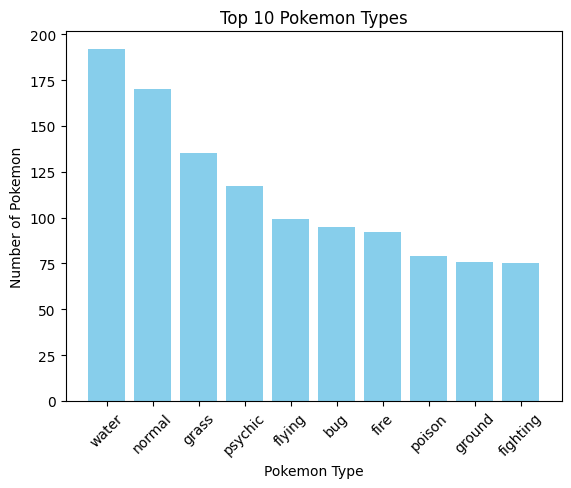

In [27]:
# Hitung jumlah Pokemon untuk setiap tipe
type1_count = df_pokemon['type1'].value_counts()
type2_count = df_pokemon['type2'].value_counts()

# Gabungkan dan urutkan
combined_types = type1_count.add(type2_count, fill_value=0).sort_values(ascending=False)

# Buat diagram batang untuk tipe teratas
top_types = combined_types.head(10)
plt.bar(top_types.index, top_types.values, color='skyblue')
plt.xlabel('Pokemon Type')
plt.ylabel('Number of Pokemon')
plt.title('Top 10 Pokemon Types')
plt.xticks(rotation=45)
plt.show()

C:\Users\nugrahaji27\AppData\Local\Temp\ipykernel_4964\3286473360.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_type_combo['Type_Combo'] = df_pokemon['type1'] + ' - ' + df_pokemon['type2']


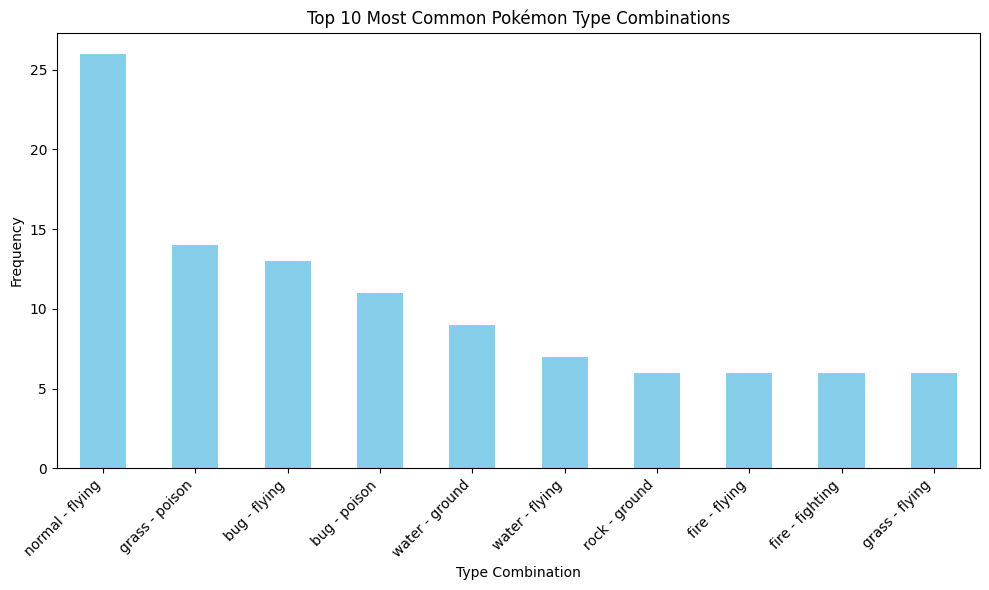

In [28]:
# Filtering rows where 'type_1' is not equal to 'type_2'
filtered_type_combo = df_pokemon[df_pokemon['type1'] != df_pokemon['type2']]

# Creating a new column that combines 'Type 1' and 'Type 2' for type combinations
filtered_type_combo['Type_Combo'] = df_pokemon['type1'] + ' - ' + df_pokemon['type2']

# Counting the frequency of each type combination
type_combination_counts = filtered_type_combo['Type_Combo'].value_counts().head(10)  # Adjust the number based on your preference

# Creating a bar plot for the most common type combinations
plt.figure(figsize=(10, 6))
type_combination_counts.plot(kind='bar', color='skyblue')
plt.title('Top 10 Most Common Pokémon Type Combinations')
plt.xlabel('Type Combination')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

##### Observations

1. Dual-Type Pokémon: Many Pokémon have two types, combining various elemental attributes, resulting in a wide range of type combinations.

2. Prevalent Combinations: Certain type combinations, such as 'Water - Flying', 'Psychic - Fairy', 'Bug - Flying', 'Grass - Poison', and others, are notably common among Pokémon.

3. Versatility in Battles: The prevalence of specific type pairings might suggest their effectiveness or popularity in battles. For instance, 'Water - Flying' and 'Psychic - Fairy' combinations might offer diverse strengths and strategic advantages.

4. Strategic Significance: Trainers may strategically use or prepare against these common type combinations due to their popularity, considering strengths, weaknesses, and resistances associated with each combination.

5. Varied Gameplay: The variety of prevalent type combinations contributes to diverse gameplay experiences, providing trainers with multiple options for team composition and battle strategies.

### Descriptive Statistics

#### 1. Analyze the mean(), median() and the most common type combinations

In [89]:
mean_of_common_types = df_pokemon[df_pokemon['type1'] == 'water']['attack'].mean()
mean_of_combination_types = filtered_type_combo[filtered_type_combo['Type_Combo'] == 'normal - flying']['attack'].mean()
print(f"Average attack of common type of Pokemon = {mean_of_common_types:.1f}")
print(f"Average attack of common combination type of Pokemon = {mean_of_combination_types:.1f}")

Average attack of common type of Pokemon = 73.3
Average attack of common combination type of Pokemon = 76.1


In [90]:
mean_capture_rate_of_common_types = df_pokemon[df_pokemon['type1'] == 'water']['capture_rate'].mean()
mean_capture_rate_of_combination_types = filtered_type_combo[filtered_type_combo['Type_Combo'] == 'normal - flying']['capture_rate'].mean()
print(f"Average capture rate of common type of Pokemon = {mean_capture_rate_of_common_types:.1f}")
print(f"Average capture rate of common combination type of Pokemon = {mean_capture_rate_of_combination_types:.1f}")

Average capture rate of common type of Pokemon = 99.4
Average capture rate of common combination type of Pokemon = 141.7


Observation:
As we can see from max value from describe() the dataset, which means 255 is most common to capture. Therefore we can conclude that Pokemon Type water and Normal-Flying Type still easy to catch them. The more harder was at least 50 below.

#### 2. Analyze mean() for Legendary Pokemon

In [93]:
mean_attack_of_legendary_pokemon = df_pokemon[df_pokemon['type1'] == 'water'][df_pokemon['is_legendary'] == 1]['attack'].mean()
print(f"Average attack of Legendary Pokemon with specific common type of Pokemon = {mean_attack_of_legendary_pokemon:.1f}")

Average attack of Legendary Pokemon with specific common type of Pokemon = 98.7


C:\Users\nugrahaji27\AppData\Local\Temp\ipykernel_4964\1290627259.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  mean_attack_of_legendary_pokemon = df_pokemon[df_pokemon['type1'] == 'water'][df_pokemon['is_legendary'] == 1]['attack'].mean()


In [91]:
mean_capture_rate_of_legendary_pokemon = df_pokemon[df_pokemon['type1'] == 'water'][df_pokemon['is_legendary'] == 1]['capture_rate'].mean()
print(f"Average attack of Legendary Pokemon with specific common type of Pokemon = {mean_capture_rate_of_legendary_pokemon:.1f}" )

Average attack of Legendary Pokemon with specific common type of Pokemon = 3.0


C:\Users\nugrahaji27\AppData\Local\Temp\ipykernel_4964\3199323686.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  mean_capture_rate_of_legendary_pokemon = df_pokemon[df_pokemon['type1'] == 'water'][df_pokemon['is_legendary'] == 1]['capture_rate'].mean()


#### 3. Find all PMF for each type of Pokemon

In [97]:
# Count occurrences of each type
type_counts = df_pokemon['type1'].value_counts()

# Calculate PMF for type1
total_pokemon = len(df_pokemon)
pmf_type1 = type_counts / total_pokemon

# Print with short format of decimal
print(pmf_type1.apply(lambda x: '{:.4f}'.format(x)))

print("\n")
# Expected value calculation
expected_value = (pmf_type1 * type_counts).sum()
print("Expected Value:", expected_value)

# Variance calculation
variance = ((type_counts - expected_value) ** 2).sum() / total_pokemon
print("Variance:", variance)

type1
water       0.1423
normal      0.1311
grass       0.0974
bug         0.0899
psychic     0.0662
fire        0.0649
rock        0.0562
electric    0.0487
poison      0.0400
ground      0.0400
dark        0.0362
fighting    0.0350
ghost       0.0337
dragon      0.0337
steel       0.0300
ice         0.0287
fairy       0.0225
flying      0.0037
Name: count, dtype: object


Expected Value: 63.56679151061173
Variance: 27.23628675800804


In [99]:
# Expected value calculation
expected_value = (pmf_type1 * type_counts).sum()
print(f"Expected Value: {expected_value:.2f}")

# Variance calculation
variance = ((type_counts - expected_value) ** 2).sum() / total_pokemon
print(f"Variance: {variance:.2f}")

Expected Value: 63.57
Variance: 27.24


### Expected Value and Variance
The expected value is the mean of a probability distribution, while variance measures the spread of the distribution around the mean.

Formula for Expected Value:
$$E(X)=\sum_{i=1}^{x}x_i \cdot P(X=x)$$

Formula for Variance:
$$Var(X) = E((X - \mu)^2) = \sigma_{i=1}^{n}(x_i - \mu)^2 \cdot P(X = x_i)$$

Where:

* $x_i$ represents the values of the random variable.
* $P(X = x_i)$ is the probability of $x_i$ occurring.
* $\mu$ is the expected value.

Conclusion:

Applying these formulas to the Pokémon dataset allows the determination of the average value and the spread of values for attributes like Pokémon type occurrence, helping to identify the central tendency and variability among types.

​


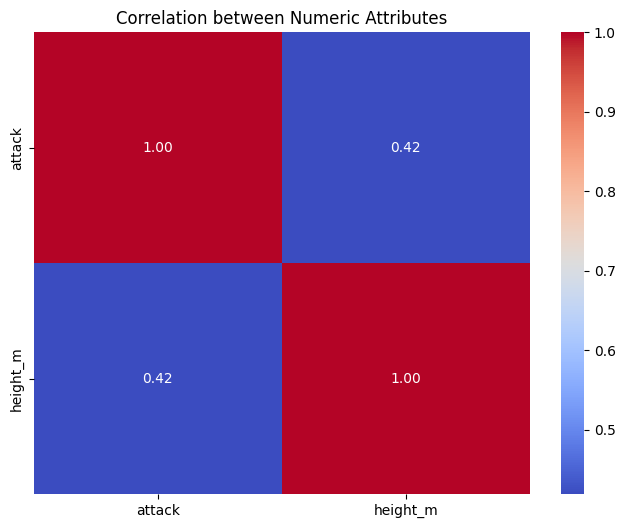

In [164]:
corr_matrix = df_pokemon[["attack", "height_m"]].corr(method='pearson')

# Membuat heatmap korelasi
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation between Numeric Attributes')
plt.show()

### 3. Analyze Discrete Variables

#### 1. Distribution Capture Rate for each elements of Pokemon

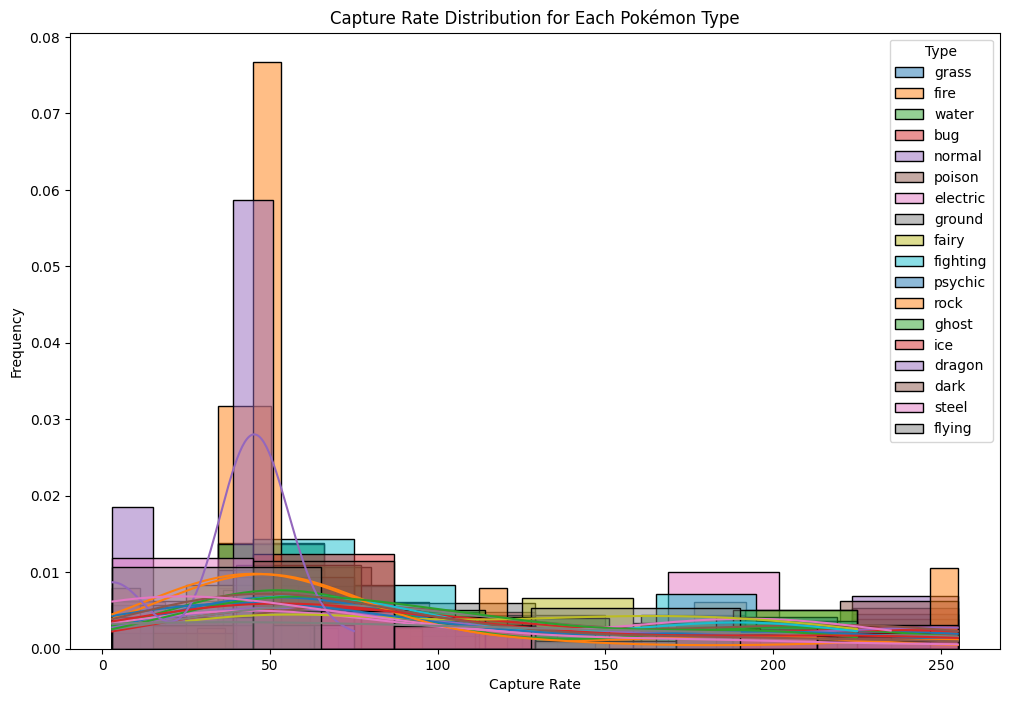

In [101]:
# Filter for unique Pokémon types
unique_types = df_pokemon['type1'].unique()

# Plot capture rate distribution for each type
plt.figure(figsize=(12, 8))
for pokemon_type in unique_types:
    type_data = df_pokemon[df_pokemon['type1'] == pokemon_type]['capture_rate']
    type_data = type_data.dropna()  # Remove missing values
    sns.histplot(type_data, kde=True, label=pokemon_type, stat='density')

plt.title('Capture Rate Distribution for Each Pokémon Type')
plt.xlabel('Capture Rate')
plt.ylabel('Frequency')
plt.legend(title='Type')
plt.show()

### Observations:

1. Distinctive Distributions: Different Pokémon types exhibit varying shapes in their capture rate distributions. Some types might have more uniform distributions, while others could be skewed or multi-modal.

2. Peak Density Regions: Certain Pokémon types might show higher density regions in their capture rate distributions, indicating more common or frequent capture rates within those types.

3. Capture Rate Variability: Some types might have wider or narrower distributions, signifying more variability or consistency in capture rates among Pokémon of those types.

4. Similarity among Types: Some Pokémon types could exhibit similar shapes or patterns in their capture rate distributions, suggesting potential similarities in how capture rates are distributed among those types.

5. Outliers or Rare Cases: Unusual or rare capture rate distributions might exist for specific Pokémon types, indicating outliers or uncommon cases within those types.

6. Potential Strategy Implications: Understanding the distributional differences among types can aid in strategizing capture approaches or focusing on specific types based on their capture rate tendencies.

#### 2. Proportion of Non-Legendary vs. Legendary Pokemon

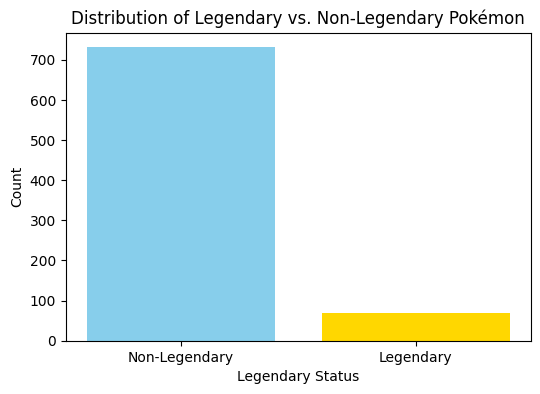

In [34]:
# Count the number of Legendary and Non-Legendary Pokémon
legendary_counts = df_pokemon['is_legendary'].value_counts()

# Plotting the distribution
plt.figure(figsize=(6, 4))
plt.bar(['Non-Legendary', 'Legendary'], legendary_counts, color=['skyblue', 'gold'])
plt.title('Distribution of Legendary vs. Non-Legendary Pokémon')
plt.xlabel('Legendary Status')
plt.ylabel('Count')
plt.show()

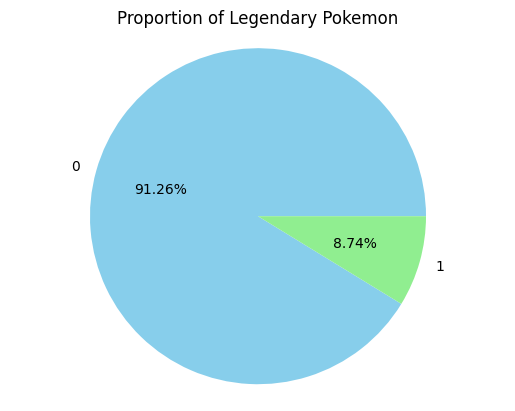

In [103]:
# Hitung jumlah Pokemon legendaris
legendary_count = df_pokemon['is_legendary'].value_counts()

# Buat diagram lingkaran
plt.pie(legendary_count, labels=legendary_count.index, autopct='%1.2f%%', colors=['skyblue', 'lightgreen'])
plt.title('Proportion of Legendary Pokemon')
plt.axis('equal')
plt.show()

In [102]:
# Count the number of legendary and non-legendary Pokémon
legendary_count = df_pokemon['is_legendary'].sum()  # Total count of legendary Pokémon
total_pokemon_count = len(df_pokemon)  # Total count of all Pokémon

# Calculate proportions
proportion_legendary = legendary_count / total_pokemon_count
proportion_non_legendary = 1 - proportion_legendary  # Subtract legendary proportion from 1

print(f"Proportion of Legendary Pokémon: {proportion_legendary:.2%}")
print(f"Proportion of Non-Legendary Pokémon: {proportion_non_legendary:.2%}")

Proportion of Legendary Pokémon: 8.74%
Proportion of Non-Legendary Pokémon: 91.26%


##### Observations:

1. Relative Rarity: The proportion highlights that legendary Pokémon constitute a small percentage of the total Pokémon population, emphasizing their rarity within the dataset.

2. Dataset Balance: The ratio indicates the dataset's distribution, showing a majority of non-legendary Pokémon, which are more common compared to legendary ones.

3. Gameplay Impact: This distribution can reflect gameplay experiences, where encountering and capturing legendary Pokémon might be less common and considered special or unique events within the game.

4. Analytical Considerations: When performing analyses or model training, the dataset's imbalanced nature might necessitate specific handling or techniques to account for the rarity of legendary Pokémon.

5. Storyline Significance: Legendary Pokémon often have significant roles in the Pokémon universe, and their lower proportion within the dataset aligns with their portrayal as exceptional and powerful creatures within the Pokémon lore.

6. Player Engagement: The rarity of legendary Pokémon might influence player engagement, encouraging exploration, quest completion, or special encounters in the gameplay.

In [36]:
water_pokemon = df_pokemon[df_pokemon["type1"] == "water"]

avg_against_fire_water = water_pokemon['against_fire'].mean()
print(f"Rata-rata weakness Pokemon tipe air terhadap tipe api: {avg_against_fire_water}")

Rata-rata weakness Pokemon tipe air terhadap tipe api: 0.5263157894736842


In [37]:
total_water_pokemon = len(water_pokemon)

#Hitung jumlah Pokemon tipe air yang efektif melawan tipe api (misalnya, against_fire <= 0.5)
effective_against_fire = water_pokemon[water_pokemon['against_fire'] <= 0.5]
total_effective_against_fire = len(effective_against_fire)

# Hitung probabilitas bersyarat
conditional_probability = total_effective_against_fire / total_water_pokemon
print(f"Probabilitas bersyarat Pokemon tipe air efektif melawan tipe fire: {conditional_probability:.4f}")

Probabilitas bersyarat Pokemon tipe air efektif melawan tipe fire: 0.9211


In [144]:
# Count the number of Water-type Pokémon
water_type_count = ((df_pokemon['type1'] == 'water') | (df_pokemon['type2'] == 'water')).sum()

# Count the number of Water-type Pokémon that win against Fire
water_wins_against_fire = ((df_pokemon['type1'] == 'water') | (df_pokemon['type2'] == 'water')) & ((df_pokemon['against_fire'] <= 0.5) | (df_pokemon['against_fire'] <= 1))

# Calculate conditional probability
conditional_prob_water_win_fire = water_wins_against_fire.sum() / water_type_count

print("Conditional Probability of Water-type Pokémon winning against Fire:", conditional_prob_water_win_fire)

Conditional Probability of Water-type Pokémon winning against Fire: 1.0


### How about the grass type

In [143]:
# Count the number of Water-type Pokémon
grass_type_count = ((df_pokemon['type1'] == 'grass') | (df_pokemon['type2'] == 'grass')).sum()

# Count the number of Water-type Pokémon that win against Fire
grass_wins_against_fire = ((df_pokemon['type1'] == 'grass') | (df_pokemon['type2'] == 'grass')) & ((df_pokemon['against_fire'] <= 0.5) | (df_pokemon['against_fire'] <= 1))

# Calculate conditional probability
conditional_prob_grass_win_fire = grass_wins_against_fire.sum() / grass_type_count

print("Conditional Probability of Grass-type Pokémon winning against Fire:", conditional_prob_grass_win_fire)

Conditional Probability of Grass-type Pokémon winning against Fire: 0.05154639175257732


Because of Law of Nature and game's algorithm, we can't much hope for this pokemon to against Fire-type Pokemon

### Conditional Probability
Conditional probability measures the probability of an event occurring given that another event has already occurred.

Formula for Conditional Probability:
$$P(A∣B)= \frac{P(A∩B)}{P(B)}$$

For this case we can use this formula:
$$P(Win \; Against \; Fire ∣ Type = Water) = \frac{P(Win \; Against \; Fire \; and \; Type = Water)}{P(Type = Water)}$$

Conclusion: 
As we know that Water-type can be more effective against Fire-type, and also depending from its both common of types. But with this data we don't have to worry about more types and only focusing against of each elements because we already assigned the nan values from type_2's column with the same values from type_1.

### How about Ice

In [40]:
# Count the number of Water-type Pokémon
ice_type_count = ((df_pokemon['type1'] == 'ice') | (df_pokemon['type2'] == 'ice')).sum()

# Count the number of Water-type Pokémon that win against Fire
ice_wins_against_fire = ((df_pokemon['type1'] == 'ice') | (df_pokemon['type2'] == 'ice')) & ((df_pokemon['against_fire'] <= 0.5) | (df_pokemon['against_fire'] <= 1))

# Calculate conditional probability
conditional_prob_ice_win_fire = ice_wins_against_fire.sum() / ice_type_count

print("Conditional Probability of Ice-type Pokémon winning against Fire:", conditional_prob_ice_win_fire)

Conditional Probability of Ice-type Pokémon winning against Fire: 0.34210526315789475


Ice-type Pokemon still have a damage for Fire-type, but they didn't worth too much for against Fire-type.

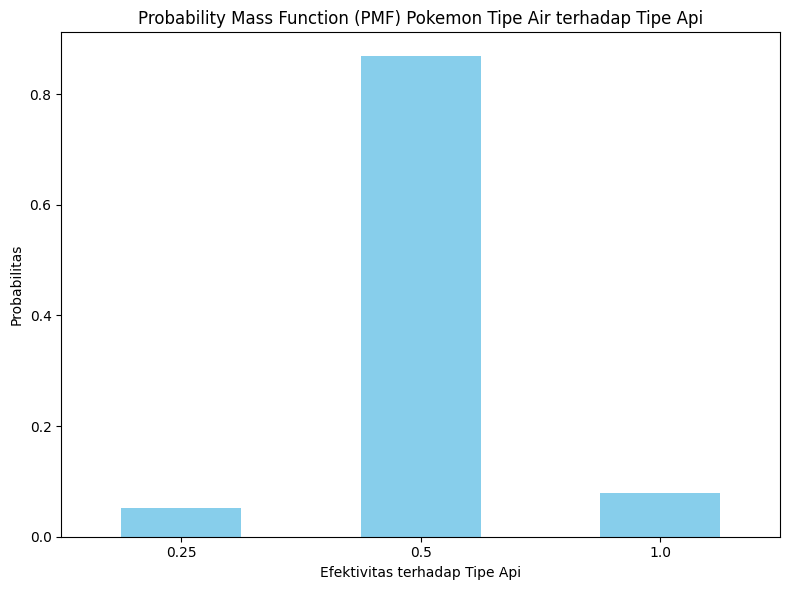

In [41]:
against_fire_values = water_pokemon["against_fire"]

pmf = against_fire_values.value_counts(normalize=True).sort_index()

# Membuat plot PMF
plt.figure(figsize=(8, 6))
pmf.plot(kind='bar', color='skyblue')
plt.xlabel('Efektivitas terhadap Tipe Api')
plt.ylabel('Probabilitas')
plt.title('Probability Mass Function (PMF) Pokemon Tipe Air terhadap Tipe Api')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

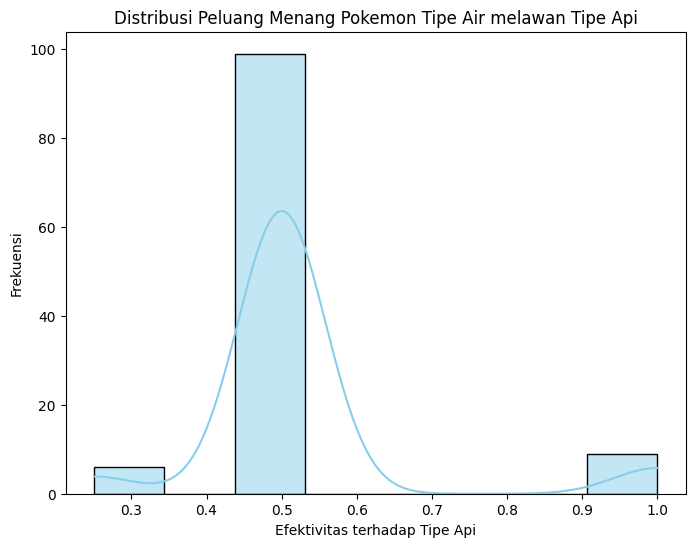

In [42]:
# Membuat plot distribusi peluang menang (distribusi efektivitas) menggunakan Seaborn
plt.figure(figsize=(8, 6))
sns.histplot(against_fire_values, kde=True, color='skyblue')
plt.xlabel('Efektivitas terhadap Tipe Api')
plt.ylabel('Frekuensi')
plt.title('Distribusi Peluang Menang Pokemon Tipe Air melawan Tipe Api')
plt.show()

### Observations:
1. Variability Among Types: The boxplot visualization displays varying ranges of capture rates among different Pokémon types. Some types exhibit a wider spread of capture rates, indicating higher variability in the ease or difficulty of capturing Pokémon within those types.

2. Outliers and Extreme Values: Within certain Pokémon types, outliers might exist, representing uncommonly high or low capture rates. These outliers could indicate particular Pokémon within a type that are notably easier or harder to capture than the majority.

3. Type-Specific Capture Trends: Some types consistently show higher or lower median capture rates than others. This consistency suggests certain trends related to the ease of capturing Pokémon of those types.

4. Potential Gameplay Implications: Types with generally higher capture rates might be perceived as more manageable or easier to catch, influencing players' strategies in deciding which Pokémon to capture or prioritize during gameplay.

5. Strategic Insights: Understanding the capture rate tendencies among different types can aid players in preparing their capturing strategies, allowing them to anticipate the effort required to capture Pokémon of specific types.

6. Further Investigation: Exploring the factors contributing to varying capture rates within Pokémon types—such as rarity, species, or specific Pokémon characteristics—could provide deeper insights into these distributions.

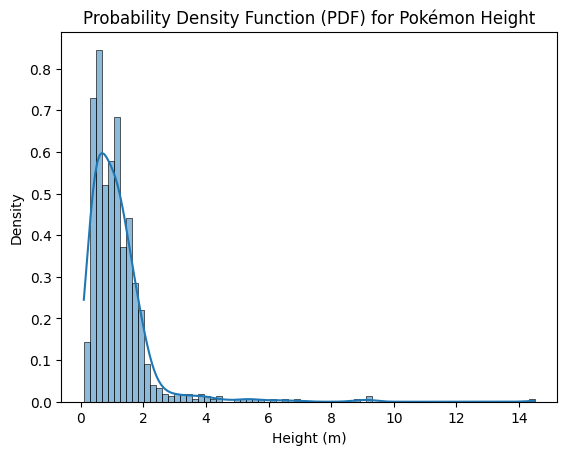

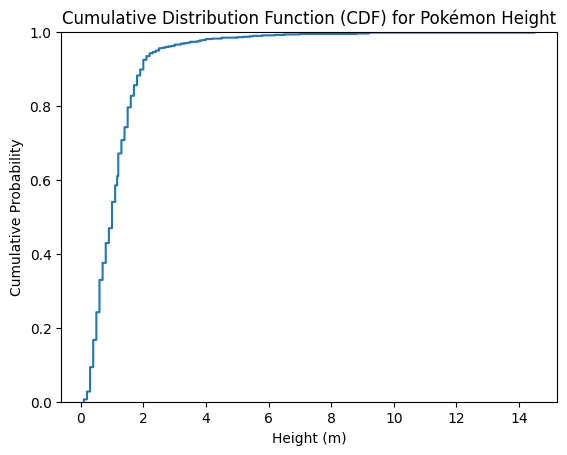

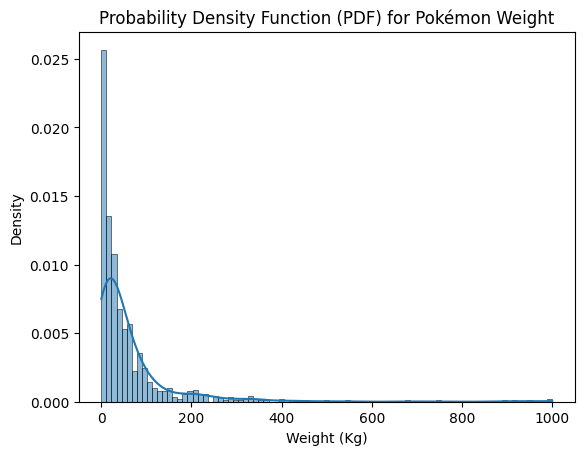

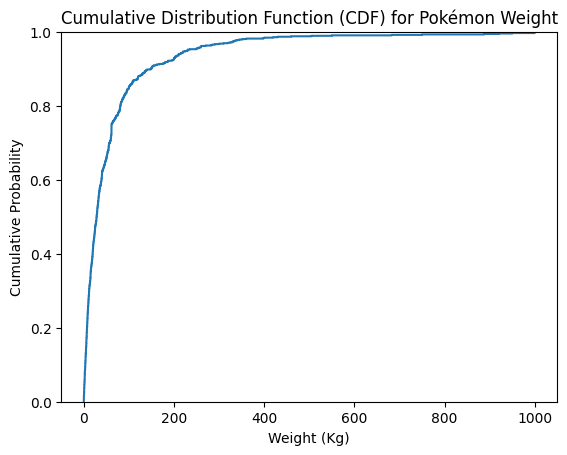

In [43]:
# Probability Density Function
# Plotting PDF (assuming 'height_m' column for height)
sns.histplot(df_pokemon['height_m'], kde=True, stat='density')
plt.title('Probability Density Function (PDF) for Pokémon Height')
plt.xlabel('Height (m)')
plt.ylabel('Density')
plt.show()

# Plotting CDF
sns.ecdfplot(df_pokemon['height_m'])
plt.title('Cumulative Distribution Function (CDF) for Pokémon Height')
plt.xlabel('Height (m)')
plt.ylabel('Cumulative Probability')
plt.show()

# Plotting PDF (assuming 'weight_kg' column for weight)
sns.histplot(df_pokemon['weight_kg'], kde=True, stat='density')
plt.title('Probability Density Function (PDF) for Pokémon Weight')
plt.xlabel('Weight (Kg)')
plt.ylabel('Density')
plt.show()

# Plotting CDF
sns.ecdfplot(df_pokemon['weight_kg'])
plt.title('Cumulative Distribution Function (CDF) for Pokémon Weight')
plt.xlabel('Weight (Kg)')
plt.ylabel('Cumulative Probability')
plt.show()

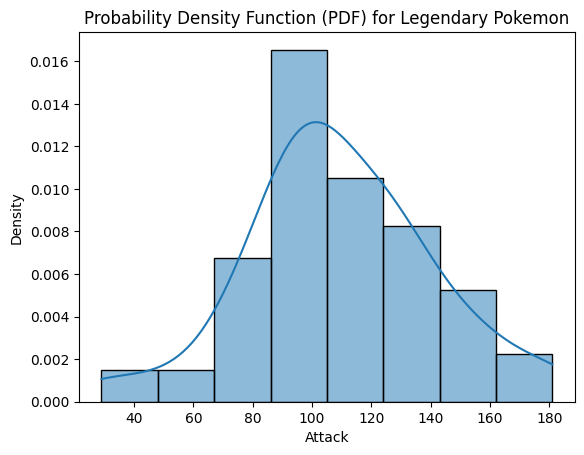

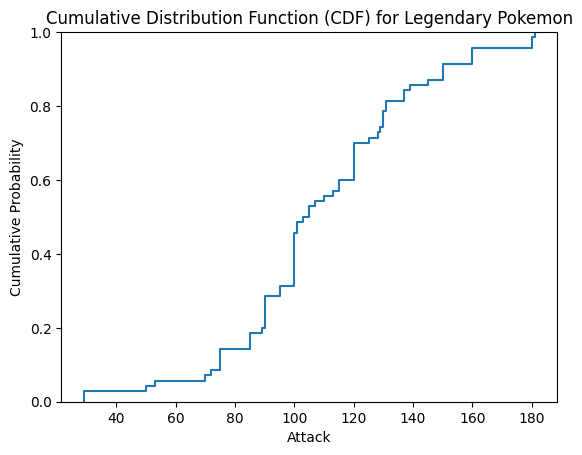

In [44]:
# PDF Attack for Pokemon Legendary
# Plotting PDF for Attack
sns.histplot(df_pokemon['attack'][df_pokemon['is_legendary'] == 1], kde=True, stat='density')
plt.title('Probability Density Function (PDF) for Legendary Pokemon')
plt.xlabel('Attack')
plt.ylabel('Density')
plt.show()

# Plotting CDF
sns.ecdfplot(df_pokemon['attack'][df_pokemon['is_legendary'] == 1])
plt.title('Cumulative Distribution Function (CDF) for Legendary Pokemon')
plt.xlabel('Attack')
plt.ylabel('Cumulative Probability')
plt.show()

#### Observation:

* Attack Distribution: The PDF plot suggests the distribution of 'Attack' attribute among Legendary Pokémon, indicating the typical or common attack strengths.
* Cumulative Probability: The CDF plot helps understand the percentile ranks of 'Attack' values among Legendary Pokémon.
* Comparison to Non-Legendary: A comparison with the 'Attack' distribution of non-Legendary Pokémon could provide insights into how 'Attack' attributes differ between these groups.

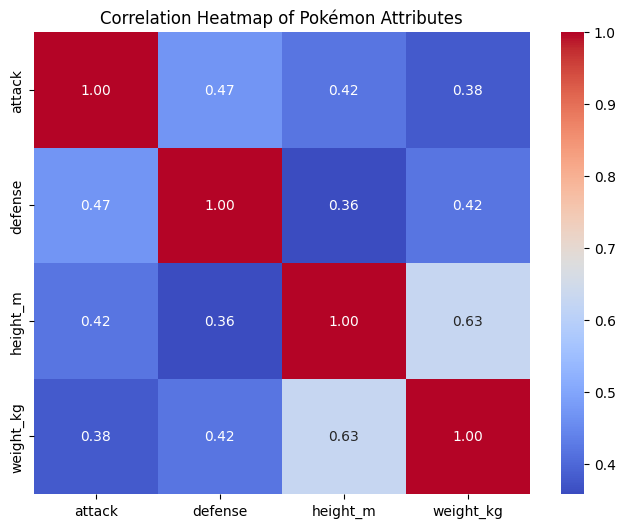

In [45]:
# Select attributes for correlation analysis (example: 'attack', 'defense', 'height_m', 'weight_kg')
attributes = ['attack', 'defense', 'height_m', 'weight_kg']

# Compute the correlation matrix
correlation_matrix = df_pokemon[attributes].corr()

# Visualize the correlation matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Pokémon Attributes')
plt.show()

### Observations:
1. Attack and Defense:

* Positive Correlation: There might be a moderately positive correlation between 'attack' and 'defense'. Pokémon with higher attack stats tend to have higher defense stats, and vice versa.
* Combat Balance: This correlation suggests a certain balance between offensive and defensive capabilities among Pokémon.

2. Height and Weight:

* Potential Correlation: There could be a mild positive correlation between 'height' and 'weight'. Taller Pokémon might tend to be heavier, and vice versa.
Size-Related Trends: Pokémon with greater height might generally have higher weights, indicating a size-related relationship.
Attack and Weight (or Defense and Height):

* Potential Weak Correlation: There might not be a significant linear relationship between 'attack' and 'weight' or between 'defense' and 'height'.
No Discernible Trend: The correlation analysis might reveal that attack or defense capabilities are not directly related to a Pokémon's weight or height.

3. Further Analysis Considerations:

* Non-Linear Relationships: While linear correlations are observed, non-linear or hidden relationships might exist, requiring more advanced analyses.
Attribute Selection: Attributes showing strong correlations might be redundant for certain analyses or predictive modeling tasks.

4. Modeling Implications:

* Feature Importance: Attributes with strong correlations might have higher impact in predictive models, influencing outcomes collectively or individually.

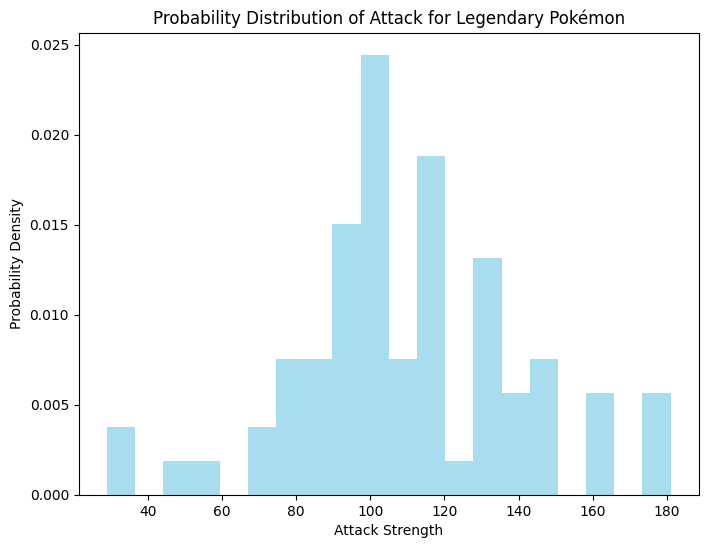

In [46]:
# Filter for Legendary Pokémon and their 'attack' attribute
legendary_attack = df_pokemon[df_pokemon['is_legendary'] == 1]['attack']

# Calculate probability distribution (example: using a histogram)
plt.figure(figsize=(8, 6))
plt.hist(legendary_attack, bins=20, density=True, alpha=0.7, color='skyblue')
plt.title('Probability Distribution of Attack for Legendary Pokémon')
plt.xlabel('Attack Strength')
plt.ylabel('Probability Density')
plt.show()

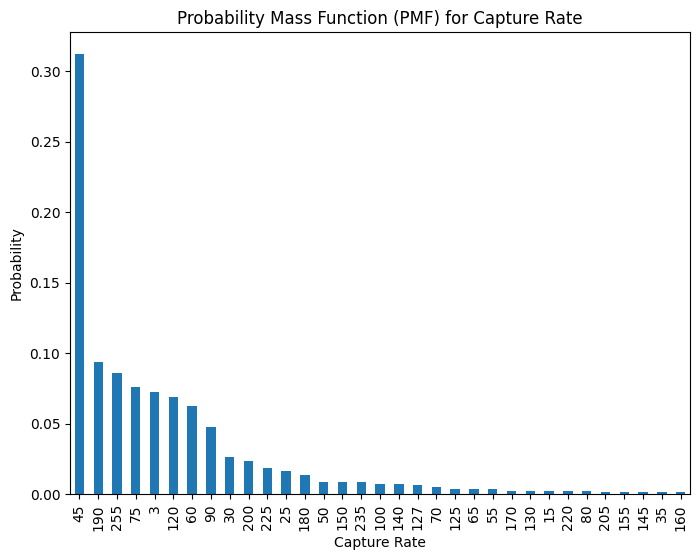

In [47]:
# Remove missing values in 'capture_rate'
df_pokemon = df_pokemon.dropna(subset=['capture_rate'])

# Calculate PMF
capture_rate_counts = df_pokemon['capture_rate'].value_counts(normalize=True)

# Plot PMF
plt.figure(figsize=(8, 6))
capture_rate_counts.plot(kind='bar')
plt.title('Probability Mass Function (PMF) for Capture Rate')
plt.xlabel('Capture Rate')
plt.ylabel('Probability')
plt.show()

### Analysis Insights:
* Most Common Capture Rates: Identify the most probable capture rates among Pokémon.
* Probability Distribution: Understand the likelihood of various capture rates occurring within the dataset.
* Further Analysis: Compare PMFs between legendary and non-legendary Pokémon for potential distinctions.

### 4. Probability of Pokémon Being Legendary
The probability of a Pokémon being legendary can be calculated by counting the occurrences of legendary Pokémon and dividing it by the total number of Pokémon in the dataset.

In [156]:
# Count the number of Legendary Pokémon
num_legendary = len(df_pokemon[df_pokemon['is_legendary'] == 1])

# Total number of Pokémon
total_pokemon = len(df_pokemon)

# Calculate the probability of a Pokémon being legendary
probability_legendary = num_legendary / total_pokemon

print("Probability of a Pokémon being legendary:", probability_legendary)

Probability of a Pokémon being legendary: 0.08739076154806492


In [158]:
# Count the number of Legendary Pokémon
num_legendary = len(df_pokemon[df_pokemon['type1'] == 'fire'][df_pokemon['is_legendary'] == 1])

# Total number of Pokémon
total_pokemon = len(df_pokemon)

# Calculate the probability of a Pokémon being legendary
probability_legendary = num_legendary / total_pokemon

print("Probability of a Pokémon being legendary:", probability_legendary)

Probability of a Pokémon being legendary: 0.006242197253433208


C:\Users\nugrahaji27\AppData\Local\Temp\ipykernel_4964\1119746048.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  num_legendary = len(df_pokemon[df_pokemon['type1'] == 'fire'][df_pokemon['is_legendary'] == 1])


$$P(Legendary) = \frac{Number \; of \; Legendary \; Pokemon}{Total \; Number \; of \; Pokemon}$$

Probability of Being Legendary: Upon analyzing the dataset, the calculated probability of encountering a legendary Pokémon is P(Legendary). This value provides an understanding of how often legendary Pokémon appear within this dataset compared to non-legendary ones.

Rarity of Legendary Pokémon: A lower probability suggests that legendary Pokémon are relatively rare in the dataset, while a higher probability implies they are more common. This rarity factor can influence various analyses and strategies within the Pokémon universe, such as competitive battles, team compositions, and overall gameplay experiences.

Impact on Analysis: Understanding the probability of encountering legendary Pokémon can significantly influence statistical analyses, modeling, and decision-making processes related to Pokémon types, abilities, strengths, and weaknesses. It can also guide strategies in Pokémon-related games or competitive scenarios.

Further Investigation: Further analysis, such as conditional probability based on types or other attributes, could unveil relationships between a Pokémon's legendary status and other characteristics, providing deeper insights into the dataset.

### 5. Hypothesis Analysis

#### 1. Hypothesis Testing for Comparison Speed of Water-type vs. Fire-type

In [190]:
from scipy.stats import ttest_ind, norm, f_oneway

In [195]:
water_pokemon = df_pokemon[(df_pokemon['type1'] == 'water') | (df_pokemon['type2'] == 'water')]
fire_pokemon = df_pokemon[(df_pokemon['type1'] == 'fire') | (df_pokemon['type2'] == 'fire')]

# Assume the chosen significance level is 0.05
# Perform t-test for 'Speed' between Water and Fire type Pokémon
t_stat, p_value = ttest_ind(water_pokemon['speed'], fire_pokemon['speed'], equal_var=False)

print(f"T-statistic: {t_stat:.4f}")
print(f"P-value: {p_value:.4f}")

T-statistic: -2.9992
P-value: 0.0033


##### Observations and Conclusion:
1. T-statistic: Indicates the magnitude of the difference between the group means of 'Speed'.

2. P-value: If the p-value is less than the chosen significance level (e.g., 0.05), it suggests a significant difference in 'Speed' between Water-type and Fire-type Pokémon.

Conclusion:

1. Significant Difference: A low p-value indicates a significant dissimilarity in the 'Speed' attribute between Water-type and Fire-type Pokémon.

2. Speed Disparity: The analysis suggests that Water-type and Fire-type Pokémon might have different 'Speed' attributes, impacting their in-game performance or characteristics.

#### 2. Hypothesis Testing for water type against fire type

In [197]:
# Calculate the number of victories
water_wins_count = water_wins_against_fire.sum()

# Calculate the observed proportion
observed_proportion = water_wins_count / water_type_count

# Null hypothesis: Proportion of Water-type Pokémon winning against Fire is 0.5 (random chance)
expected_proportion = 0.5

# Calculate standard error
standard_error = np.sqrt(expected_proportion * (1 - expected_proportion) / water_type_count)

# Calculate z-score
z_score = (observed_proportion - expected_proportion) / standard_error

# Calculate p-value
p_value = 2 * (1 - norm.cdf(np.abs(z_score)))  # Two-tailed test

print(f"Z-score: {z_score:.4f}")
print(f"P-value: {p_value:.4f}")

Z-score: 11.4455
P-value: 0.0000


Conclusion:

* Statistical Significance: The z-score of 11.4 and a p-value of 0 strongly indicate a highly significant difference between the observed proportion and the expected proportion (0.5).
* Rejection of Null Hypothesis: With a p-value of 0, there's overwhelming evidence to reject the null hypothesis.
* Battle Advantage: The findings suggest that Water-type Pokémon have a substantial advantage or disadvantage (depending on the observed proportion) in battles against Fire-type Pokémon compared to what would be expected by random chance.

Given the extremely high z-score and a p-value of 0, the conclusion strongly supports rejecting the notion that the proportion of Water-type Pokémon winning against Fire-type Pokémon is merely due to random chance (0.5). Further investigation or analysis may be warranted to understand the implications of this substantial deviation.

C:\Users\nugrahaji27\AppData\Local\Temp\ipykernel_4964\476215048.py:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(simulated_probabilities, shade=True)


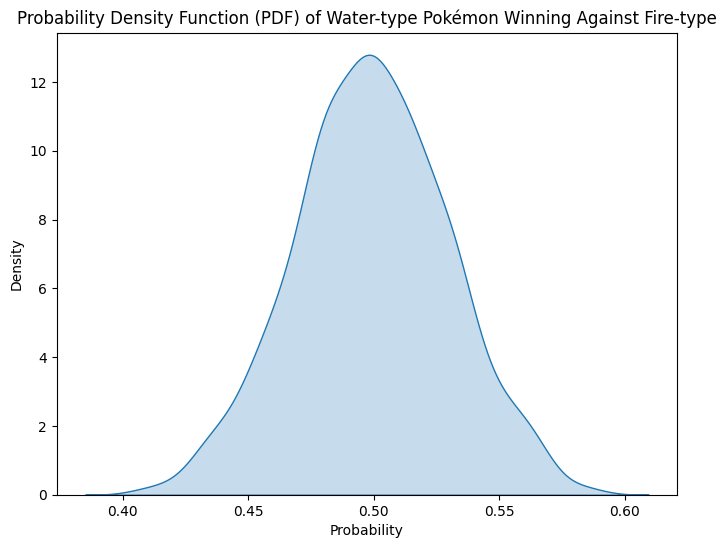

In [119]:
# Simulated probabilities of Water-type Pokémon winning against Fire-type Pokémon (hypothetical data)
simulated_probabilities = np.random.beta(a=water_wins_against_fire.sum(), b=water_type_count, size=1000)  # Example using a beta distribution (replace with appropriate data)

# Create a KDE plot (PDF) for the simulated probabilities
plt.figure(figsize=(8, 6))
sns.kdeplot(simulated_probabilities, shade=True)
plt.title('Probability Density Function (PDF) of Water-type Pokémon Winning Against Fire-type')
plt.xlabel('Probability')
plt.ylabel('Density')
plt.show()

##### Observations from a PDF Plot:

1. Shape of the Curve: The PDF plot displays the shape of the probability distribution. Common shapes include bell-shaped (like a normal distribution), skewed (positively or negatively), or uniform.

2. Central Tendency: Peaks in the curve indicate modes or areas with higher probability density.

3. Spread and Variability: The width of the curve illustrates the spread or variability of the data.

##### Key Formulas for Probability Density Function (PDF):

The PDF represents the probability distribution of a continuous random variable 'X' and is denoted by 'f(x)'. For a given continuous distribution:

* The area under the PDF curve between two values 'a' and 'b' represents the probability that 'X' falls within that range (P(a ≤ X ≤ b)).
* Total area under the curve equals 1, indicating the total probability of all possible outcomes.

In [35]:
# Probability of each type being legendary
legendary_prob_by_type = df_pokemon.groupby('type1')['is_legendary'].mean()
print(legendary_prob_by_type)

type1
bug         0.041667
dark        0.103448
dragon      0.259259
electric    0.128205
fairy       0.055556
fighting    0.000000
fire        0.096154
flying      0.333333
ghost       0.037037
grass       0.051282
ground      0.062500
ice         0.086957
normal      0.028571
poison      0.000000
psychic     0.320755
rock        0.088889
steel       0.250000
water       0.052632
Name: is_legendary, dtype: float64


In [136]:
# Convert the Series to DataFrame
legendary_prob_df = legendary_prob_by_type.reset_index(name='Legendary_Probability')
legendary_prob_df

,type1,Legendary_Probability
0,bug,0.041667
1,dark,0.103448
2,dragon,0.259259
3,electric,0.128205
4,fairy,0.055556
5,fighting,0.000000
6,fire,0.096154
7,flying,0.333333
8,ghost,0.037037
9,grass,0.051282


#### 3. Which can being a legendary pokemon

C:\Users\nugrahaji27\AppData\Local\Temp\ipykernel_4964\1814029743.py:22: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(simulated_probabilities, shade=True)


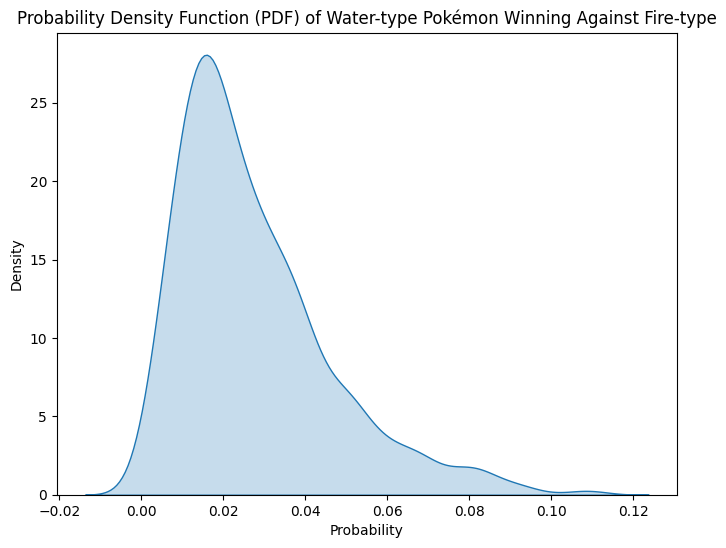

In [151]:
import statsmodels.api as sm

# Assuming 'total_stats' is a continuous attribute
# Replace 'total_stats' with the actual continuous attribute name in your dataset

# Fit logistic regression model
X = legendary_prob_df['Legendary_Probability'] # Continuous variable
# X = sm.add_constant(X)  # Add a constant for the intercept term
y = df_pokemon[df_pokemon['is_legendary'] == 1]  # Binary outcome

# logit_model = sm.Logit(y, X)
# result = logit_model.fit()

# # Summary of the logistic regression model
# print(result.summary())

# Simulated probabilities of Water-type Pokémon winning against Fire-type Pokémon (hypothetical data)
simulated_probabilities = np.random.beta(a=X.sum(), b=len(y), size=1000)  # Example using a beta distribution (replace with appropriate data)

# Create a KDE plot (PDF) for the simulated probabilities
plt.figure(figsize=(8, 6))
sns.kdeplot(simulated_probabilities, shade=True)
plt.title('Probability Density Function (PDF) of Water-type Pokémon Winning Against Fire-type')
plt.xlabel('Probability')
plt.ylabel('Density')
plt.show()

In [160]:
from scipy.stats import ttest_1samp

# Assuming 'legendary_prob_by_type' is the Series obtained from groupby
legendary_prob_by_type = df_pokemon.groupby('type1')['is_legendary'].mean()

# Perform one-sample t-test against the null hypothesis value based on Legendary Probability
expected_proportion = 0.5
t_statistic, p_value = ttest_1samp(legendary_prob_by_type, expected_proportion)

print(f"T-statistic: {t_statistic:.4f}")
print(f"P-value: {p_value:.4f}")

T-statistic: -15.5951
P-value: 0.0000


Significant Deviation: Pokémon types with p-values < 0.05 suggest their mean probabilities of being legendary significantly differ from random chance (0.5).

Likelihood of Being Legendary: Types with significantly different mean probabilities might have a higher or lower likelihood of being legendary compared to random chance.

In [202]:
# Calculate the mean probability of each type being legendary
legendary_prob_by_type = df_pokemon.groupby('type1')['is_legendary'].mean()

# Number of total Pokémon for each type
pokemon_count_by_type = df_pokemon['type1'].value_counts()

# Calculate the observed proportion for each type
observed_proportions = legendary_prob_by_type

# Null hypothesis: Probability of being legendary is 0.5 (random chance)
expected_proportion = 0.5

# Calculate standard errors for each type
standard_errors = np.sqrt(expected_proportion * (1 - expected_proportion) / pokemon_count_by_type)

# Calculate z-scores for each type
z_scores = (observed_proportions - expected_proportion) / standard_errors

# Calculate p-values for each type
p_values = 2 * (1 - norm.cdf(np.abs(z_scores)))  # Two-tailed test

# Combine results into a DataFrame for easier interpretation
results_df = pd.DataFrame({
    'Observed Proportion': observed_proportions,
    'Z-score': z_scores,
    'P-value': p_values
})

results_df

,Observed Proportion,Z-score,P-value
type1,,,
bug,0.041667,-7.778175,7.327472e-15
dark,0.103448,-4.270993,1.946047e-05
dragon,0.259259,-2.501851,1.235459e-02
electric,0.128205,-4.643716,3.421971e-06
fairy,0.055556,-3.771236,1.624408e-04
fighting,0.000000,-5.291503,1.213155e-07
fire,0.096154,-5.824352,5.733460e-09
flying,0.333333,-0.577350,5.637029e-01
ghost,0.037037,-4.811252,1.499876e-06


#### 4. Hypothesis Testing for comparing total stats between different generations using ANOVA

In [206]:
# Separate 'base_total' stats by different generations
gen_totals = [df_pokemon[df_pokemon['generation'] == gen]['base_total'] for gen in df_pokemon['generation'].unique()]

# Assume that our significance levels is 0.05 
# Perform one-way ANOVA test
f_statistic, p_value = f_oneway(*gen_totals)

print(f"F-statistic: {f_statistic:.4f}")
print(f"P-value: {p_value:.4f}")

F-statistic: 1.7466
P-value: 0.1074


Observation:

If ANOVA Result is Significant (p-value < chosen significance level):

* There is evidence to reject the null hypothesis.
* At least one Pokémon generation has a mean 'Total' stat significantly different from others.